In [82]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import emcee
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
names = ['1','2','3','4','5','6']
labels = [r'\Omega_m', r'\sigma_8', r'\alpha_\lambda', r'\beta_\lambda',r'\gamma_\lambda',r'\sigma_\lambda']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [84]:
n_cut=490000

In [92]:
n_cut=490000
path = '../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_log10m_masked'), allow_pickle = True)
N_log10m = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+log10m (SBI)')

t = np.load(path.format('log10m_masked'), allow_pickle = True)
log10m = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'log10m (SBI)')

t = np.load(path.format('count_masked'), allow_pickle = True)
N_masked = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count-masked (SBI)')

t = np.load(path.format('count'), allow_pickle = True)
N = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count (SBI)')

t = np.load(path.format('Nm'), allow_pickle = True)
Nm = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Nm (SBI)')

t = np.load(path.format('count_Nm'), allow_pickle = True)
count_Nm = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm (SBI)')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [93]:
n_cut=490000
path = '../../capish_sbi_data/config_sbi_DESlike6_corrected_standard_prior_6_params/samples_of_{}_posterior_with_data_flagship_like_sim_one.pkl'

t = np.load(path.format('count'), allow_pickle = True)
N_onesim = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count (SBI, one sim)')

t = np.load(path.format('Nm'), allow_pickle = True)
Nm_onesim = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Nm (SBI, one sim)')

t = np.load(path.format('count_Nm'), allow_pickle = True)
count_Nm_onesim = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm (SBI, one sim)')

Removed no burn in
Removed no burn in
Removed no burn in


In [94]:
def read_mcmc(file):
    backend = emcee.backends.HDFBackend(file)
    chain = backend.get_chain(discard=0, thin=1, flat=True)  
    print(len(chain))
    return chain

In [95]:
params_fid=[0.319,0.813,3.5,1.72,0,0.2]
minimum = [0.2, 0.6, 
                                                        3.0, 1.3, 
                                                        -0.7, 0.1]
maximum = [0.45, 0.95, 
                                                        4.0, 2.1, 
                                                        0.7, 0.5]

In [96]:
print(minimum)

print(maximum)
range_ = {str(i+1): [minimum[i], maximum[i]] for i in range(len(params_fid))}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }

[0.2, 0.6, 3.0, 1.3, -0.7, 0.1]
[0.45, 0.95, 4.0, 2.1, 0.7, 0.5]


In [97]:
params_fid=[0.319,0.813,3.5,1.72,0,0.2]
#params_fid=[0.319,0.813,3.5,0.8,0.3]

In [98]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

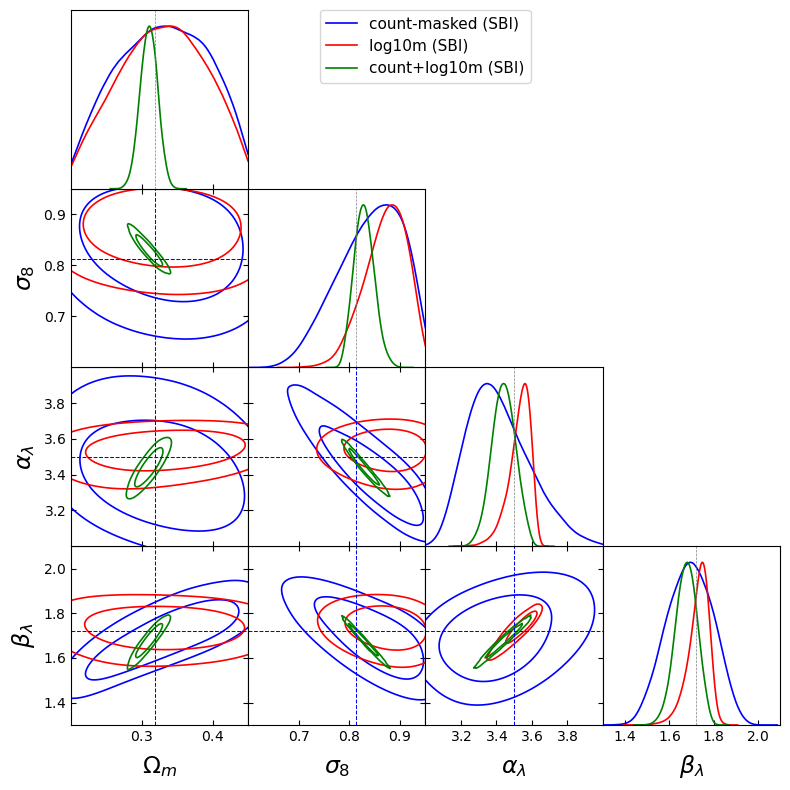

In [108]:

g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 14
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([N_masked, log10m, N_log10m],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, False, False,], 
                contour_colors = ['b', 'r', 'g', ], 
                contour_ls=['-','-','-',],
                contour_lws=[1.2,1.2,1.2,1.2],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','3','4'],
                markers=markers,
                param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_SBI2.png', dpi = 300)

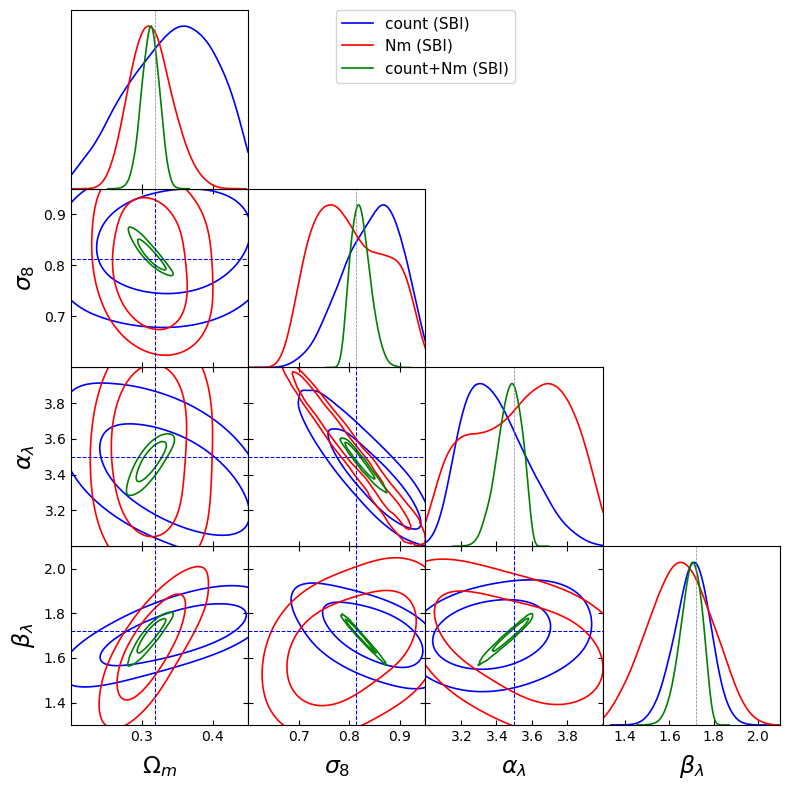

In [107]:

g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 14
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([N, Nm, count_Nm],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, False, False,], 
                contour_colors = ['b', 'r', 'g', ], 
                contour_ls=['-','-','-',],
                contour_lws=[1.2,1.2,1.2,1.2],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','3','4'],
                markers=markers,
                param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_SBI2.png', dpi = 300)

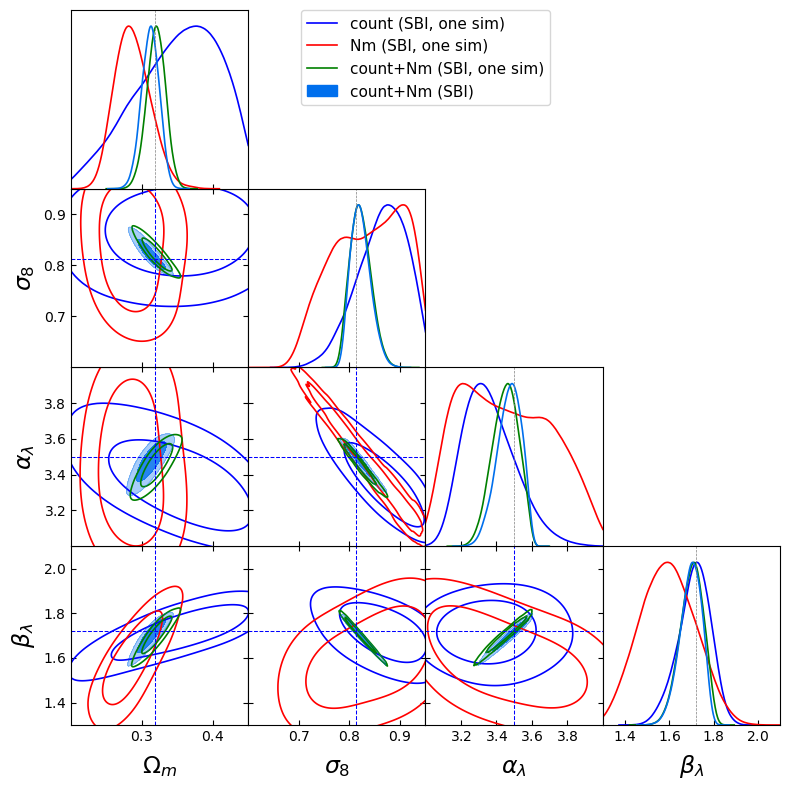

In [109]:

g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 14
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[0.2, 0.5], '2':[0.6,0.9], '3':[2.5,4.5], '4':[1, 2.5],'5':[-1,1], '6':[0.1, 0.5], }
g.triangle_plot([N_onesim, Nm_onesim, count_Nm_onesim, count_Nm],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, False, False,], 
                contour_colors = ['b', 'r', 'g', ], 
                contour_ls=['-','-','-',],
                contour_lws=[1.2,1.2,1.2,1.2],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','3','4'],
                markers=markers,
                param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'mcmc_SBI2.png', dpi = 300)

In [102]:
n_cut=20000
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}
path = '../validation_capish_comparison_to_standard_approach/mcmc_chains/chains_{}.h5'

t = read_mcmc(path.format('count_only'))
N_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count (MCMC)')

t = read_mcmc(path.format('mass_only'))
m_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'm (MCMC)')

t = read_mcmc(path.format('count_mass'))
Nm_mcmc = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+m (MCMC)')

45000
Removed no burn in
45000
Removed no burn in
45000
Removed no burn in


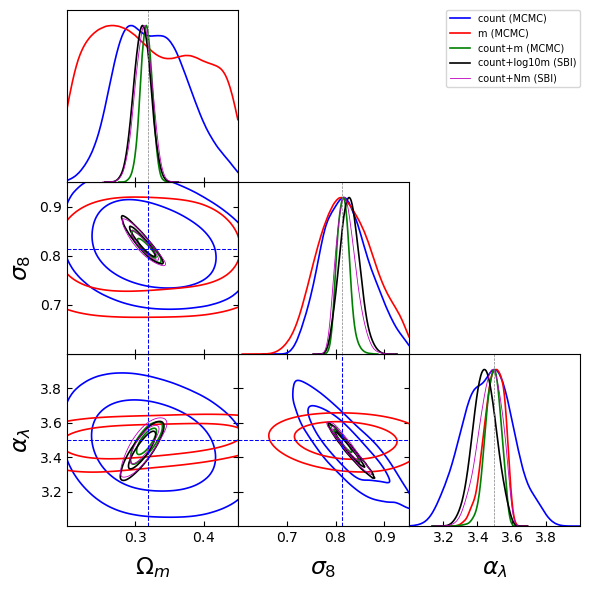

In [106]:
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 10
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot([N_mcmc, m_mcmc, Nm_mcmc, N_log10m, count_Nm],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, False, False,False, False], 
                contour_colors = ['b', 'r', 'g','k' ], 
                contour_ls=['-','-','-',],
                contour_lws=[1.2,1.2,1.2,1.2],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2','3'],
                markers=markers,
                param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
#plt.savefig(f'mcmc_SBI.png', dpi = 300)

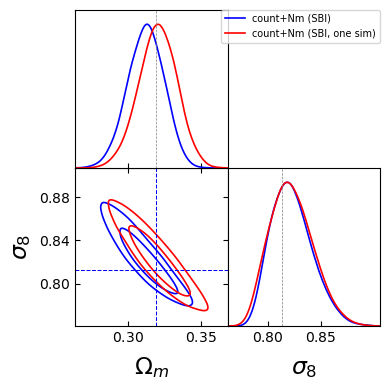

In [113]:
g = plots.get_subplot_plotter(subplot_size=2)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 10
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
#range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot([ count_Nm, count_Nm_onesim],
                #[N_Nm_power_law_log10Mwl_no_scatter],
                filled=[False, False, False,False, False], 
                contour_colors = ['b', 'r', 'g','k' ], 
                contour_ls=['-','-','-',],
                contour_lws=[1.2,1.2,1.2,1.2],
                #shaded=[False, False, True],
                legend_fontsize = 10,
                params=['1','2'],
                markers=markers,
                #param_limits = range_,
                fine_bins = 5,  
                marker_args = marker_args)
#plt.savefig(f'mcmc_SBI.png', dpi = 300)

In [74]:
t = read_mcmc(path.format('count_only'))

45000


(array([  225.,  1274.,  4337.,  7502., 13684.,  7838.,  5253.,  2790.,
         1408.,   689.]),
 array([0.20508848, 0.22956095, 0.25403342, 0.27850589, 0.30297837,
        0.32745084, 0.35192331, 0.37639578, 0.40086825, 0.42534073,
        0.4498132 ]),
 <BarContainer object of 10 artists>)

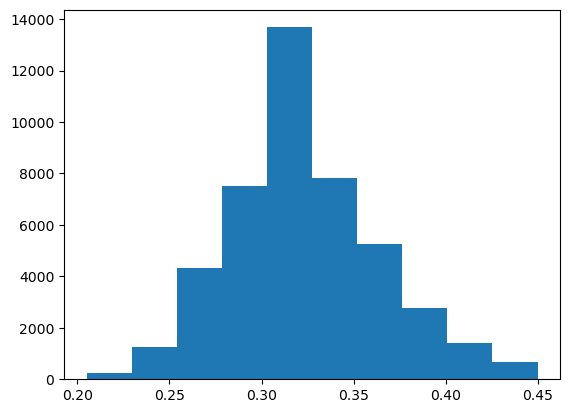

In [75]:
plt.hist(t[:,0])